In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
train_complex_path = '/content/gdrive/MyDrive/baselines/muss/resources/datasets/wikilarge_detokenized/train.complex'
train_simple_path =  '/content/gdrive/MyDrive/baselines/muss/resources/datasets/wikilarge_detokenized/train.simple'


In [3]:
with open('/content/gdrive/MyDrive/baselines/muss/resources/datasets/wikilarge_detokenized/train.complex','r') as f:
  source = f.readlines()

In [4]:
with open(train_simple_path,'r') as f:
  target = f.readlines()

In [5]:
import spacy 
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

2022-09-10 09:14:49.618004: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 27.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
import numpy as np
len_arr = np.zeros(len(source),dtype='float')

for i,sentence in enumerate(source):
    length = len(sentence)
    len_arr[i] = length

average_source_length = np.mean(len_arr)
# print(average_source_length)

In [7]:
import numpy as np
len_arr = np.zeros(len(target),dtype='float')

for i,sentence in enumerate(target):
    length = len(sentence)
    len_arr[i] = length

average_target_length = np.mean(len_arr)

In [8]:
average_target_length

94.72530549726385

In [9]:
len_arr.shape

(296402,)

In [10]:
target[0]

'There is some proof that Austen continued to work on these pieces later in life. Her nephew and niece, James Edward and Anna Austen, may have made further additions to her work in around 1814.\n'

In [11]:
# doc=nlp(source[0])

In [12]:
# sc1 = nlp(source[0])

In [13]:
# [ent.text for ent in sc1.ents]

In [14]:
%cd /content/gdrive/MyDrive/baselines

/content/gdrive/MyDrive/baselines


In [15]:
import numpy as np

# Saving NumPy array as a csv file
# array_rain_fall = np.loadtxt(fname="rain-fall.csv", delimiter=",")
# array =  np.array([1,2,34,3,4],dtype='float')
# np.savetxt(fname="random_array.csv", delimiter=",", X=array)

In [16]:


def get_jaccard_similarity(complex_sentence,simple_sentence):
    s1 = set(complex_sentence)
    s2 = set(simple_sentence)
    J  =  float(len(s1.intersection(s2)) / len(s1.union(s2)))
    
    return J

In [17]:
def compute_jaccard(inps,outps):
  jacc_list=[]
  n=len(inps)
  m=len(outps)
  if n!=m:
    print("length error")
  elif n==m:
    for i in range(n):
      jacc_list.append(get_jaccard_similarity([ent.text for ent in nlp(inps[i])],[ent.text for ent in nlp(outps[i])]))
    return jacc_list

In [ ]:
hold=compute_jaccard(source,target)
np.savetxt(fname="jaccard_wikilarge.csv", delimiter=",", X=hold)

In [18]:
hold = np.loadtxt(fname="jaccard_wikilarge.csv", delimiter=",")
print(hold)

[0.55813953 0.69230769 0.20338983 ... 0.06521739 0.71428571 0.63265306]


In [22]:
hold_mean = np.mean(hold)
print(hold_mean)

0.4724655757216963


In [23]:
import numpy as np
import matplotlib.pyplot as plt


In [24]:
# reduced_jaccs = []
# j_list = []
# for j in range(0,len(hold)):
#   if j % 10000 == 0:
#     j_list.append(j)
#     reduced_jaccs.append(hold[j])
  
# plt.plot(reduced_jaccs,j_list)
# plt.show()


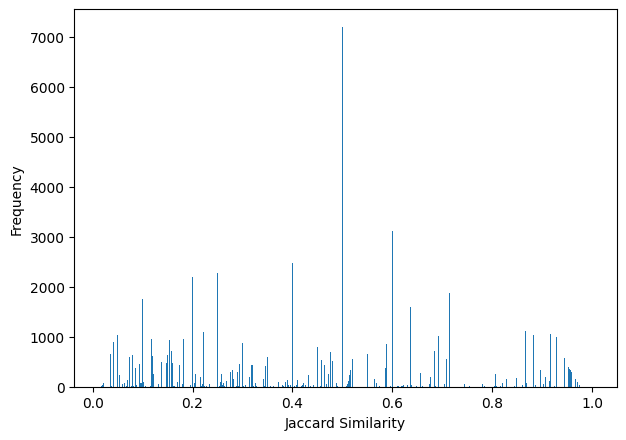

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

from scipy.stats import norm
import statistics
  
plt.hist(hold, bins= 3000) #len(hold) = 296400
plt.gca().set(xlabel='Jaccard Similarity', ylabel='Frequency');


In [27]:
import seaborn as sns 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Jaccard Similarity')

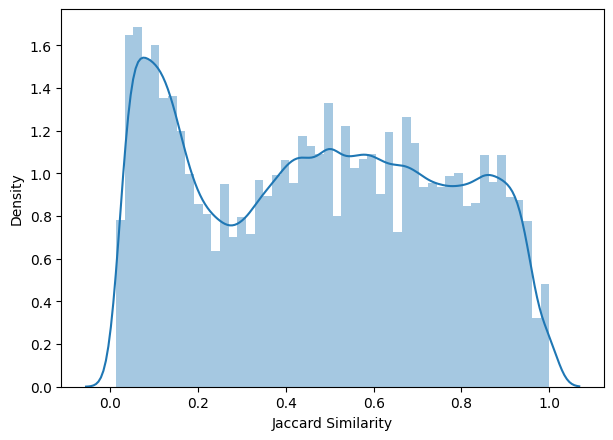

In [28]:
sns.distplot(hold)
plt.xlabel('Jaccard Similarity')

Text(0.5, 0, 'Jaccard Similarity')

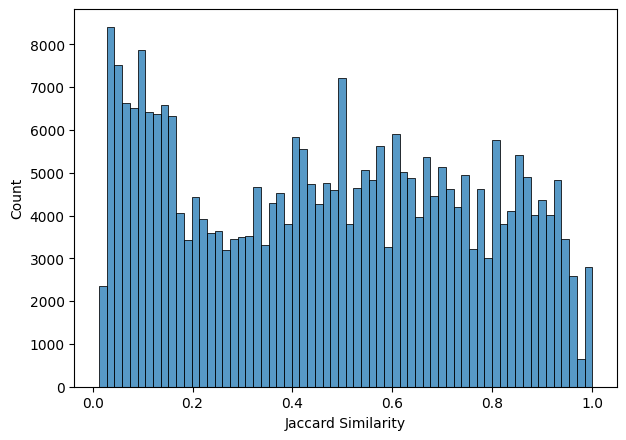

In [29]:
sns.histplot(hold)
plt.xlabel('Jaccard Similarity')

In [30]:
len(hold)

296402

In [ ]:
# calculating jaccard for source and predictions of distilbertgpt2

In [31]:
with open('/content/gdrive/MyDrive/baselines/bert_gpt2/bert_gpt2/source_preds.csv','r') as f:
  source_preds = f.readlines()

sources = []
preds = []

for i, sent in enumerate(source_preds):
  if i == 0:
    sources.append(sent)
  elif i == 1:
    preds.append(sent)
  elif i % 2 == 0:
    sources.append(sent)
  elif i % 2 != 0:
    preds.append(sent)



In [32]:

def get_jaccard_similarity(complex_sentence,simple_sentence):
    s1 = set(complex_sentence)
    s2 = set(simple_sentence)
    J  =  float(len(s1.intersection(s2)) / len(s1.union(s2)))
    
    return J

def compute_jaccard(inps,outps):
  jacc_list=[]
  n=len(inps)
  m=len(outps)
  if n!=m:
    print("length error")
  elif n==m:
    for i in range(n):
      jacc_list.append(get_jaccard_similarity([ent.text for ent in nlp(inps[i])],[ent.text for ent in nlp(outps[i])]))
    return jacc_list


In [33]:
hold=compute_jaccard(sources,preds)
np.savetxt(fname="jaccard_distilbert.csv", delimiter=",", X=hold)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Jaccard Similarity')

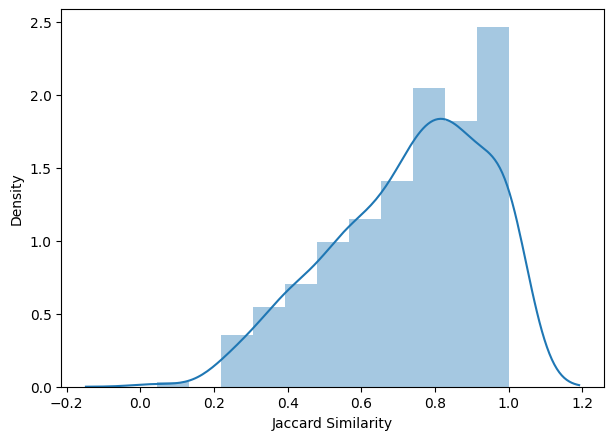

In [34]:
import seaborn as sns 


sns.distplot(hold)
plt.xlabel('Jaccard Similarity')


Text(0.5, 0, 'Jaccard Similarity')

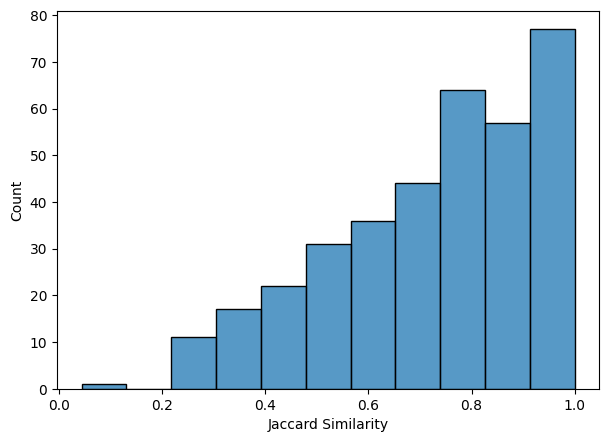

In [35]:
sns.histplot(hold)
plt.xlabel('Jaccard Similarity')

In [36]:
distil_mean = np.mean(hold)
print(distil_mean)

0.7304678058488987


In [ ]:
preds[0]

'A historian has stated that "it was quinine\'s effectiveness that gave colonists fresh opportunities to move somewhere in large numbers into the Gold Coast, Nigeria and other parts of west Africa\'.\n'

'A historian has stated that " it was quinine \'s efficacy that gave colonists fresh opportunities to swarm into the Gold Coast , Nigeria and other parts of west Africa " .\n'

In [ ]:
source_preds[1]

'A historian has stated that "it was quinine\'s effectiveness that gave colonists fresh opportunities to move somewhere in large numbers into the Gold Coast, Nigeria and other parts of west Africa\'.\n'